# SET UP

In [2]:
# To write a Python 2/3 compatible codebase, the first step is to add this line to the top of each module
from __future__ import division, print_function, unicode_literals

# Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors, datasets
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve

# To return all running results in Jupyter Notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# set to display all columns in running result
pd.set_option('display.max_columns', 50)

# set random seed
np.random.seed(211)

### Data Import

Data Source: UC Irvine Machine Learning Repository and Knowledge Discovery in Databases Archive

The original dataset was split into training and test data by the data contributor. However, as the splitting criterion was unclear, our group has decided to combine the data and resplit for the purpose of the project.

In [3]:
#import data from url
income_train = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',sep=',\s',header = None, 
                    na_values=['?'], engine ='python')
income_test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows=[0], 
                    sep=',\s',header = None, na_values=['?'], engine = 'python')

#inspect the datasets
income_train.head()
income_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [27]:
#combine the original dataset and perform preliminary inspection
frames = [income_train, income_test]
income_df = pd.concat(frames)
income_df.shape
income_df.head()

(48842, 15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [28]:
#add column names
income_df.columns = ['age', 'work_class', 'fnlwgt', 'education','education_num','marital_status','occupation',
                  'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income' ]

In [29]:
income_df.head()

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# DATA UNDERSTANDING & PREPARATION
### Check for duplicated observations or missing values
As these observations constitute a small proportion of the complete dataset, we have decided to remove all such observations

In [30]:
income_df = income_df.dropna()
income_df = income_df.drop_duplicates()

In [31]:
print(income_df.isnull().sum())
print("The number of observations left is", income_df.shape[0])

age               0
work_class        0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64
The number of observations left is 45194


Clean up the target variables

The spelling of the target variables in original train and test sets are different as shown below. 
<br>
- Train: '<=50K', '>50K'
<br>
- Test: '<=50K.','>50K.'

We have decided to remove the extra dot in the dataset to standardize the spelling for the binary target variables across the dataset.

In [24]:
# replace "." with "" in income column
income_df['income'] = income_df['income'].str.replace(".", "")

income_df['income'].value_counts()

<=50K    33988
>50K     11206
Name: income, dtype: int64

### Convert string variables (income & sex) to binary integers

In [25]:
# convert target variable to binary integers
income_mapping = {'<=50K': [0], '>50K':[1]}
income_df['income'] = income_df['income'].replace(income_mapping)

# convert sex to binary integer
income_mapping_sex = {'Male':[0], 'Female':[1]}
income_df['sex'] = income_df['sex'].replace(income_mapping_sex)

In [26]:
# check that the replacement was performed correctly
pd.unique(income_df.income)
pd.unique(income_df.sex)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

### Feature Exploration

Check variable types. Note that the type of Age should be float.

In [15]:
income_df.dtypes

age                int64
work_class        object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex                int64
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income             int64
dtype: object

### Data Overview
Notice that there are 16,7,14,41 levels for education, martial status, occupation, and native country. These parameters need to be converted into integer dummy variables before building the models. 

In [16]:
income_df.describe(include = 'all')

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,45194.000000,45194,4.519400e+04,45194,45194.000000,45194,45194,45194,45194,45194.000000,45194.000000,45194.000000,45194.000000,45194,45194.000000
unique,NaN,7,NaN,16,NaN,7,14,6,5,NaN,NaN,NaN,NaN,41,NaN
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Craft-repair,Husband,White,NaN,NaN,NaN,NaN,United-States,NaN
freq,NaN,33281,NaN,14777,NaN,21048,6015,18659,38877,NaN,NaN,NaN,NaN,41270,NaN
mean,38.551755,NaN,1.897379e+05,NaN,10.119109,NaN,NaN,NaN,NaN,0.324933,1102.112736,88.650308,40.941209,NaN,0.247953
std,13.215806,NaN,1.056407e+05,NaN,2.552057,NaN,NaN,NaN,NaN,0.468355,7508.705003,405.075515,12.006449,NaN,0.431829
min,17.000000,NaN,1.349200e+04,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,0.000000
25%,28.000000,NaN,1.173922e+05,NaN,9.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,40.000000,NaN,0.000000
50%,37.000000,NaN,1.783120e+05,NaN,10.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,40.000000,NaN,0.000000
75%,47.000000,NaN,2.379030e+05,NaN,13.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,45.000000,NaN,0.000000


#### Income (Target Varible)
Definition: Whether a person's income is above or below 50K per year
<br>
Type: Binary
- 0='<=50K'
- 1='>50K'

Note that the Income is imbalanced distributed. A stratefied splitting would be considered as approperiate. 

col_0,count
income,
0,33988
1,11206


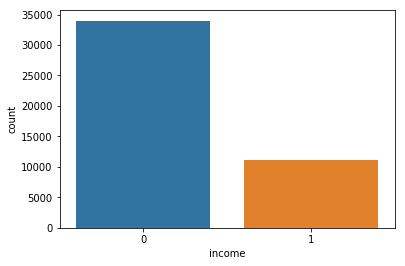

In [17]:
sns.countplot(income_df['income'])
display(pd.crosstab(index=income_df['income'],columns='count'))

#### Age
Definition: Age of the person as at the date of data collection
<br>
Type: numeric

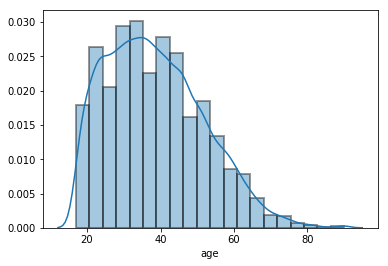

In [15]:
sns.distplot(income_df["age"],bins = 20, hist_kws=dict(edgecolor="k", linewidth=2))

#### fnlwgt
Definition: the number of units in the target population that the responding unit represents
<br>
This variable is irrelevant for the purpose of classification and is hence excluded when building models.

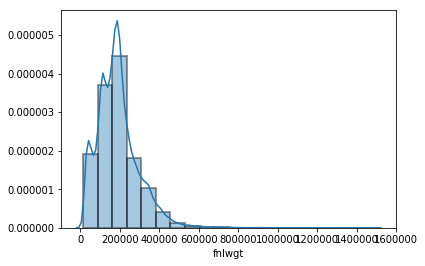

In [16]:
sns.distplot(income_df['fnlwgt'],bins = 20, hist_kws=dict(edgecolor="k", linewidth=2))

#### Education Number
Definition: The highest level of education achieved by the individual
<br>
Type: numeric

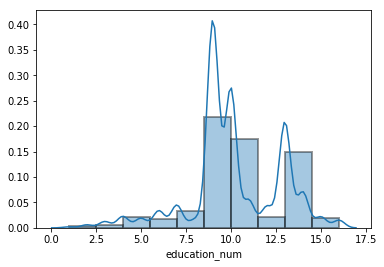

In [17]:
sns.distplot(income_df["education_num"],bins = 10, hist_kws=dict(edgecolor="k", linewidth=2))

#### Capital Gain
Definition: profit that results from a sale of a capital asset, such as stock, bond or real estate
<br>
Type: numeric


Notice that there is a small spike approaching value of 9999. This may be due to the fact that all capital gains >9999 are recorded at a cap of 9999 to eliminate extreme values. We have performed further exploration of this feature below

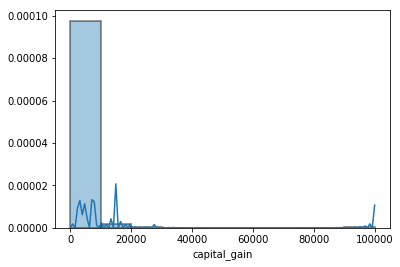

In [18]:
sns.distplot(income_df["capital_gain"],bins = 10, hist_kws=dict(edgecolor="k", linewidth=2))

In [19]:
# explore the extreme values
income_df[income_df['capital_gain']>60000]

print('The observations with capital ',np.sum(income_df.income[income_df['capital_gain']>60000] != 1))
# Note that people with all the extreme values have income larger than 50K
# This indicates that we can discrete this feature to predict the response variable before applying our model

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1246,54,Self-emp-inc,166459,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,0,99999,0,60,United-States,1
1368,52,Private,152234,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,0,99999,0,40,Japan,1
1482,53,Self-emp-inc,263925,HS-grad,9,Married-civ-spouse,Sales,Husband,White,0,99999,0,40,United-States,1
1528,52,Private,118025,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,99999,0,50,United-States,1
1616,46,Private,370119,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,0,99999,0,60,United-States,1
1682,43,Private,176270,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,99999,0,60,United-States,1
1765,49,Private,159816,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,1,99999,0,20,United-States,1
1771,50,Private,171338,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,0,99999,0,50,United-States,1
1826,22,Self-emp-not-inc,202920,HS-grad,9,Never-married,Prof-specialty,Unmarried,White,1,99999,0,40,Dominican-Republic,1
2103,43,Self-emp-inc,172826,Some-college,10,Married-civ-spouse,Sales,Husband,White,0,99999,0,55,United-States,1


The observations with capital  0


For instances with capital gain larger than 60000, income of all observations are higher than 50K. Thus, before building the model, we can use it as a filter to increase the prediction precision.

#### Capital Loss
Definition: loss that results from a sale of a capital asset, such as stock, bond or real estate
<br>
Type: numeric

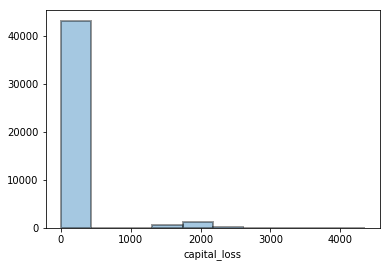

In [20]:
# histogram
cap_loss=sns.distplot(income_df["capital_loss"],bins = 10, hist_kws=dict(edgecolor="k", linewidth=2),kde=False)

#income_df[income_df.capital_loss>1000]

Noted that there are no observations with both capital gain and loss. We have conluded that the original data set has manually seperated positive and negative net capital gain. As a result, we have combined the two features into one in the final dataset

In [ ]:
# Create a new column net gain
income_df['net_capital_gain'] = income_df['capital_gain'] - income_df['capital_loss']
income_df.head()

#### Hour_Per_ Week
Definition: hours worked per week
<br>
Type: numeric

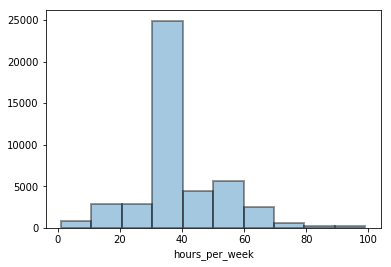

In [21]:
cap_loss=sns.distplot(income_df["hours_per_week"],bins = 10, hist_kws=dict(edgecolor="k", linewidth=2),kde=False)

#### Education
Definition: The highest level of education achieved by the individual
<br>
Type: categorical

In order to reduce the dimensions, we map the classes of education to new values based on a manually created mapping

<Figure size 1080x1080 with 0 Axes>

col_0,count
education,
10th,1223
11th,1619
12th,576
1st-4th,220
5th-6th,448
7th-8th,822
9th,676
Assoc-acdm,1507
Assoc-voc,1958


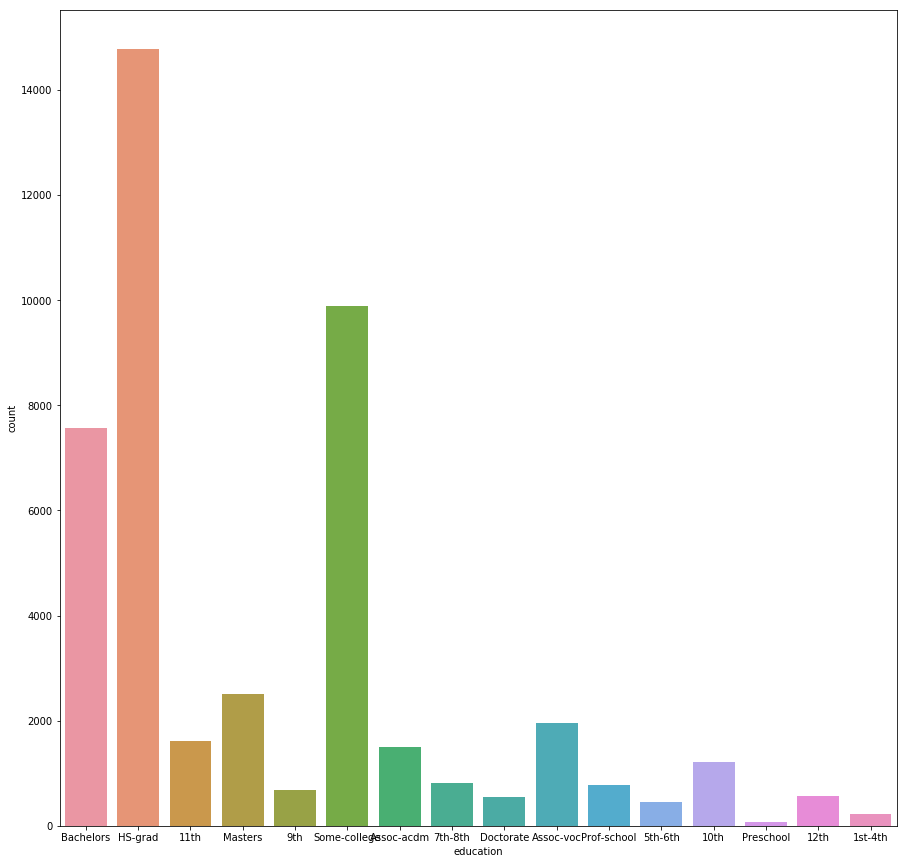

In [22]:
plt.figure(figsize = (10,10))
sns.countplot(income_df.education)
pd.crosstab(index=income_df["education"], columns="count")

In [18]:
# Education mapping
education_mapping = pd.read_csv('Education mapping.csv')

education_mapping['education'] = education_mapping['education'].str.strip()

# remove spaces
income_df['education'] = income_df.education.str.replace(" ",'')
income_df = pd.merge(income_df,education_mapping,on='education',how='left')

income_df.head()

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,education_new
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,0,Bachelors
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0,Bachelors
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0,HS-grad
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0,HS-dropouts
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0,Bachelors


#### Native Country
Definition: Country of origin for person
<br>
Type: categorical

As the original dataset contains more than 40 countries, we have reduced the dimension of this variable by grouping countries outside of US to respective continents

In [19]:
# Native country mapping
countries_mapping = pd.read_csv('Native Country Mapping.csv')

countries_mapping['native_country'] = countries_mapping['native_country'].str.strip()

income_df['native_country'] = income_df.native_country.str.lstrip()
income_df = pd.merge(income_df,countries_mapping,on='native_country',how='left')

income_df.head()

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,education_new,native_country_new
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,0,Bachelors,US
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0,Bachelors,US
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0,HS-grad,US
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0,HS-dropouts,US
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0,Bachelors,South America


### Convert Categorical Variables to Dummy Variables

In [21]:
#separate dummies
income_df = pd.get_dummies(data=income_df, columns=['work_class', 'education_new', 'marital_status', 'occupation', 'relationship', 'race', 'native_country_new'],drop_first=True)
income_df = income_df.drop(axis = 1, columns = ['fnlwgt','education','capital_gain','capital_loss','native_country'])
income_df.head()

,age,education_num,sex,hours_per_week,income,net_capital_gain,work_class_Local-gov,work_class_Private,work_class_Self-emp-inc,work_class_Self-emp-not-inc,work_class_State-gov,work_class_Without-pay,education_new_Assoc-voc,education_new_Bachelors,education_new_Doctorate,education_new_HS-dropouts,education_new_HS-grad,education_new_Masters,education_new_Pre-sec,education_new_Prof-school,education_new_Sec-school,education_new_Some-college,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,...,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,native_country_new_Europe,native_country_new_North America,native_country_new_South America,native_country_new_US
0,39,13,0,40,0,2174,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,50,13,0,13,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,38,9,0,40,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,53,7,0,40,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,28,13,1,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0


In [22]:
# set to display all columns in running result
pd.set_option('display.max_columns', 50)

income_df.to_csv('pred.csv')

# Modeling (Nested Cross Validation)

### Filter by capital_gain == 99999
As mentioned previously, it was noted during data inspection that all observations with capital_gain > 9999 belongs to income >50K. To improve our model accuracy, we have filtered the dataset to capital_gain < 9999 and build models on this final dataset.

In [23]:
f_income_df = income_df[income_df['net_capital_gain']!=99999]

### Data Splitting

In [33]:
# x and y values
y = f_income_df.income
X = f_income_df.drop(axis=1,columns='income')

# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=211,stratify = y)

In [25]:
print('Labels counts in y:')
print(y.value_counts())
print('Labels counts in y_train:')
print(y_train.value_counts())
print('Labels counts in y_test:')
print(y_test.value_counts())

Labels counts in y:
0    33988
1    10977
Name: income, dtype: int64
Labels counts in y_train:
0    27190
1     8782
Name: income, dtype: int64
Labels counts in y_test:
0    6798
1    2195
Name: income, dtype: int64


### 1. Decision Tree Model

In [71]:
# Grid search
# Choosing optimal depth of the tree AND min_samples_leaf AND min_samples_split
gs_dt = GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=211),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None], 
                               'criterion':['gini','entropy'], 
                               'min_samples_leaf':[1,2,3,4,5],
                               'min_samples_split':[2,3,4,5]}],
                  scoring='accuracy',
                  cv=5,
                  n_jobs=-1)

gs_dt.fit(X_train, y_train)

# print the best score and parameters for the best model
print(gs_dt.best_score_)
print(gs_dt.best_params_)
print(gs_dt.best_estimator_)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=211,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

0.853191371066385
{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 2}


In [33]:
# Cross Validation Scores 
scores=cross_val_score(gs_dt, X_train, y_train, 
                         scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

CV accuracy: 0.853 +/- 0.003


### 2. Logistic Regrerssion

In [76]:
#logistic model
lr_model = LogisticRegression(random_state=211)

#Use RFE to select features to be included in the logistic regression
rfe = RFE(lr_model)
rfe = rfe.fit(X_train,y_train)

In [77]:
feature_selected = list(X.columns[rfe.support_])
X_rfe = X_train[feature_selected]
print('The features selected in the logistic regression are: ')
print(feature_selected)

The features selected in the logistic regression are: 
['sex', 'work_class_Local-gov', 'work_class_Private', 'work_class_Self-emp-not-inc', 'work_class_State-gov', 'work_class_Without-pay', 'education_new_Bachelors', 'education_new_Doctorate', 'education_new_HS-dropouts', 'education_new_Masters', 'education_new_Pre-sec', 'education_new_Prof-school', 'education_new_Sec-school', 'marital_status_Married-AF-spouse', 'marital_status_Married-civ-spouse', 'marital_status_Never-married', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Wife']


In [79]:
# Grid search
# Choose optimal C AND tol AND fit_intercept AND penalty
gs_lr = GridSearchCV(estimator=LogisticRegression(random_state=211),
                  param_grid=[{'C': [0.000001,0.00001,0.0001,0.001,0.1, 1, 10, 100, 1000],
                               'tol':[0.1,0.01,0.001,0.0001,0.00001],
                               'fit_intercept': [True,False],
                               'penalty':['l1','l2'],
                              }],
                  scoring='accuracy',
                  cv=5, n_jobs=-1)

gs_lr = gs_lr.fit(X_rfe,y_train)

# print the best score and parameters for the best model
print(gs_lr.best_score_)
print(gs_lr.best_params_)
print(gs_lr.best_estimator_)

0.8290336928722339
{'C': 10, 'fit_intercept': True, 'tol': 0.001}


In [45]:
# Cross Validation Scores 
scores=cross_val_score(gs_lr, X_train, y_train, 
                         scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

CV accuracy: 0.844 +/- 0.003


### 3. KNN Model

In [62]:
#standardize the features which are numeric variables
sc = StandardScaler()
sc.fit(X_train.iloc[:, [0,1,3,4]])
X_train_std = sc.transform(X_train.iloc[:, [0,1,3,4]])
X_test_std = sc.transform(X_test.iloc[:, [0,1,3,4]])

#combine the standardized numeric variables and dummy variables
X_train_std = np.hstack((X_train_std, pd.concat([X_train.iloc[:,2], X_train.iloc[:,5:53]], axis=1).values))
X_test_std = np.hstack((X_test_std, pd.concat([X_test.iloc[:,2], X_test.iloc[:,5:53]], axis=1).values))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [63]:
# Grid search
# Choosing optimal n_neighbors AND weights
gs_knn = GridSearchCV(estimator=neighbors.KNeighborsClassifier(p=2,metric='minkowski'),
                  param_grid=[{'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21], 
                               'weights':['uniform','distance']}],
                  scoring='accuracy', 
                  cv=5,
                  n_jobs=-1)

gs_knn.fit(X_train_std,y_train)

# print the best score and parameters for the best model
print(gs_knn.best_score_)
print(gs_knn.best_params_)
print(gs_knn.best_estimator_)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21], 'weights': ['uniform', 'distance']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

0.8464917157789392
{'n_neighbors': 21, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform')


In [65]:
# Cross Validation Scores 
scores=cross_val_score(gs_knn, X_train_std, y_train, scoring='accuracy', cv=5)

print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

CV accuracy: 0.846 +/- 0.003


# EVALUATION

### ROC Curve

In [ ]:
# Label the classifiers
clf_labels = ['Logistic regression', 'Decision tree', 'KNN']
all_clf = [gs_lr, gs_dt, gs_knn]

print('5-fold cross validation:\n')
for clf, label in zip([gs_dt, gs_lr, gs_knn], clf_labels): 
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=5,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

colors = ['orange', 'blue', 'green']  
linestyles = [':', '--', '-.', '-'] 
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    # assuming the label of the positive class is 1 and data is normalized
    y_pred = clf.fit(X_train,
                     y_train).predict_proba(X_test)[:, 1] # Make predictions based on the classifiers
    fpr, tpr, thresholds = roc_curve(y_true=y_test, # Build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                # Compute Area Under the Curve (AUC) 
    plt.plot(fpr, tpr,                         
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')    # Where to place the legend
plt.plot([0, 1], [0, 1], # Visualize random classifier
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1]) 
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

plt.show()

### Learning Curve

In [100]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.01, 1.0, 10)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    #plt.xlim((0,5000))
    plt.xlabel("Training examples") 
    plt.ylabel("Score")             
    
    # Class learning_curve determines cross-validated training and test scores for different training set sizes
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # Cross validation statistics for training and testing data (mean and standard deviation)
    train_scores_mean = np.mean(train_scores, axis=1) 
    train_scores_std = np.std(train_scores, axis=1) 
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1) 

    plt.grid() 

    # Fill the area around the line to indicate the size of standard deviations for the training data
    # and the test data
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r") # train data performance indicated with red
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g") # test data performance indicated with green
    
    # Cross-validation means indicated by dots
    # Train data performance indicated with red
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    # Test data performance indicated with green
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'D:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

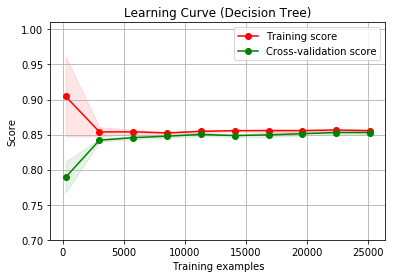

<module 'matplotlib.pyplot' from 'D:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

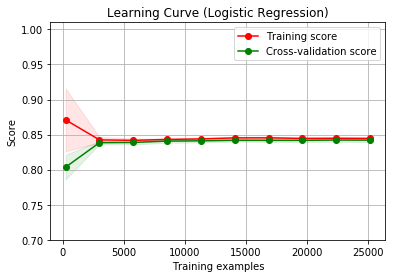

In [ ]:
# Plots the learning curve based on the previously defined function for the kNN classifier. Uses the 
# random permutation cross-validator

title = "Learning Curve (Decision Tree)"
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=211)
plot_learning_curve(gs_dt, title, X_train, y_train, (0.7, 1.01), cv=cv, n_jobs=-1)
plt.show()

title = "Learning Curve (Logistic Regression)"
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=211)
plot_learning_curve(gs_lr, title, X_train, y_train, (0.7, 1.01), cv=cv, n_jobs=-1)
plt.show()

title = "Learning Curve (kNN)"
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=211)
plot_learning_curve(gs_knn, title, X_train, y_train, (0.7, 1.01), cv=cv, n_jobs=-1)
plt.show() 

### Fitting Graphs

In [ ]:
# Specify possible parameter values for tree depths (aligned with the optimal model parameters)
param_range = [1, 2, 3, 4, 5, 6, 7]

# Determine training and test scores for varying parameter values.
train_scores, test_scores = validation_curve( 
                estimator=gs_dt, 
                X=X_train, 
                y=y_train, 
                param_name="Tree Depth", 
                param_range=param_range,
                cv=5,
                scoring="accuracy", 
                n_jobs=-1) 

# Cross validation statistics for training and testing data (mean and standard deviation)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot train accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the training data
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

# Plot test accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the test data
plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

# Grid and Axes Titles
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Tree Depths')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1.0])
plt.tight_layout()
plt.show()

# PERFORMANCE OF OPTIMAL MODEL USING TEST DATA

In [ ]:
# Function that prints and plots the confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=0)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')aa

In [ ]:
# tree prediction
tree_mod =  = tree.DecisionTreeCreeClassifier(random_state=211,
                                              criterion= 'gini', 
                                              max_depth = 7,
                                              min_samples_leaf = 3, 
                                              min_samples_split = 2)
tree_mod.fit(X_t(X_train,y_train)
tree_pred = tree_ee_mod.predict(X_t(X_test)
tree_pred[(X_(X_test.net_cap_capital_gain == 99999)] = 1

# tree confusian matrix
tree_cm = confusion_matrix(y_test, tree_pred)
np.set_pri_printoptions(precision=2)

# confusion matrix
plt.figure()
plot_confusion_matrix(tree_cm, m, pd.unique(tre(tree_pred),
                          normalize=False,
                          title='Confusion matrix',
                          cmap=ap=plt.cm.Blues)

# Normalized confusian matrix 
plt.figure()
plot_confusion_matrix(tree_cm, m, pd.unique(tre(tree_pred),
                          normalize=True,
                          title='Normalized Confusion matrix',
                          cmap=ap=plt.cm.Blues)

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, tree_pred))

# F1 score
print('F1 score (out-of-sample): ', f1_score(y_test, tree_pred, average='macro'))

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, tree_pred))